# Building_A_Handwritten_Digits_Classifier

In this project, we explored the effectiveness of deep, feedforward neural networks at classifying images and experimented with different models to classify handwritten digits.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [2]:
digits_data.keys()

dict_keys(['target', 'data', 'images', 'target_names', 'DESCR'])

In [3]:
digits_data.data.shape

(1797, 64)

In [4]:
# creating series of target
labels = pd.Series(digits_data['target'])
labels.head(20)

0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9     9
10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
dtype: int64

In [5]:
# generating dataframe of data
data = pd.DataFrame(digits_data['data'])
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


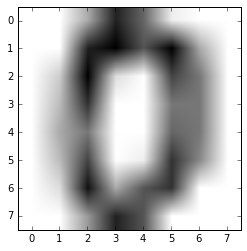

In [6]:
# extracting first image
first_image = data.iloc[0]

# assigning values of first image
np_image = first_image.values

# reshaping image having array of size 64
# into shape (8,8) as n_rows * n_columns = 8*8 = 64
np_image = np_image.reshape(8,8)

# visualizing the data which is now in the right shape
plt.imshow(np_image, cmap='gray_r')

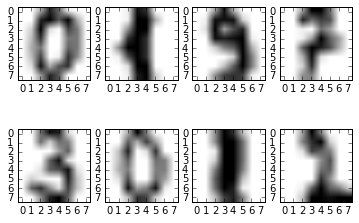

In [7]:
# generating scatter plot grid with 2 rows and 4 columns
fig, axesarr = plt.subplots(2,4)

axesarr[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axesarr[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axesarr[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axesarr[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axesarr[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axesarr[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axesarr[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axesarr[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [8]:
# using KNeighborsClassifier algorithm to capture
# non-linearity in the data

# setting a pipeline for testing and training knn models
def train(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_labels'] = test_labels
    train_test_df['predicted_labels'] = predictions
    overall_accuracy = sum(train_test_df['correct_labels']
                           == train_test_df['predicted_labels'])/len(train_test_df)
    return overall_accuracy

def cross_validation(k):
    fold_accuracies = []
    kfold = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kfold.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_one_accuracies = cross_validation(1)
knn_one_accuracies

[0.9688888888888889,
 0.9599109131403119,
 0.9799554565701559,
 0.9621380846325167]

In [9]:
# calculating mean of accuracies on 4 folds
np.mean(knn_one_accuracies)

0.9677233358079684

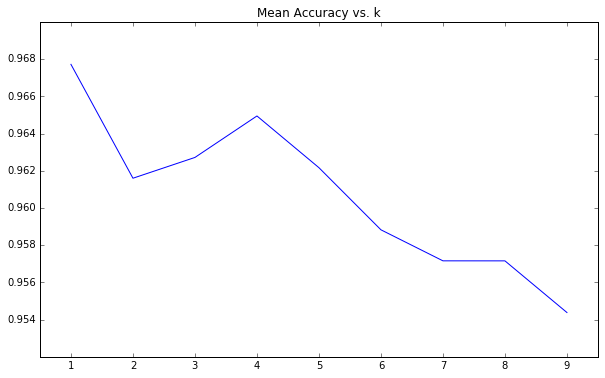

In [10]:
# plotting the resulting classification accuracies

k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validation(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)

plt.figure(figsize=(10,6))
plt.plot(k_values, k_overall_accuracies)
plt.xlim(0.5, 9.5)
plt.ylim(0.952, 0.970)
plt.xticks(np.arange(1, 10, step=1))
plt.yticks(np.arange(0.954, 0.968, step=0.002))
plt.title('Mean Accuracy vs. k')
plt.show()

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer using the MLPClassifier

In [11]:
# Neural Network with one hidden layer
# having different number of neurons

def train(neuron_arch, train_features, train_labels):
    mlp_nn = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp_nn.fit(train_features, train_labels)
    return mlp_nn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_labels'] = test_labels
    train_test_df['predicted_labels'] = predictions
    overall_accuracy = sum(train_test_df['correct_labels']
                           == train_test_df['predicted_labels'])/len(train_test_df)
    return overall_accuracy

def cross_validation(neuron_arch):
    fold_accuracies = []
    kfold = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kfold.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



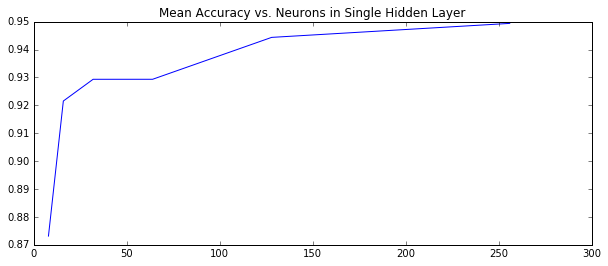

In [12]:
# creating list of single hidden layer neurons
nn_one_hidlay_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

nn_one_hidlay_accuracies = []

for nn in nn_one_hidlay_neurons:
    nn_accuracies = cross_validation(nn)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_hidlay_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(10,4))
plt.title('Mean Accuracy vs. Neurons in Single Hidden Layer')
# plt.xlim(-5, 265)
# plt.ylim(0.85, 0.952)
# plt.xticks(np.arange(0, 260, step=50))
# plt.yticks(np.arange(0.86, 0.95, step=0.01))
x = [x[0] for x in nn_one_hidlay_neurons]
plt.plot(x, nn_one_hidlay_accuracies)

In [13]:
nn_one_hidlay_accuracies

[0.8731267013115566,
 0.9215330363771344,
 0.9293231873298688,
 0.9293268992823558,
 0.9443454590447908,
 0.9493578322197476]

#### Summary

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

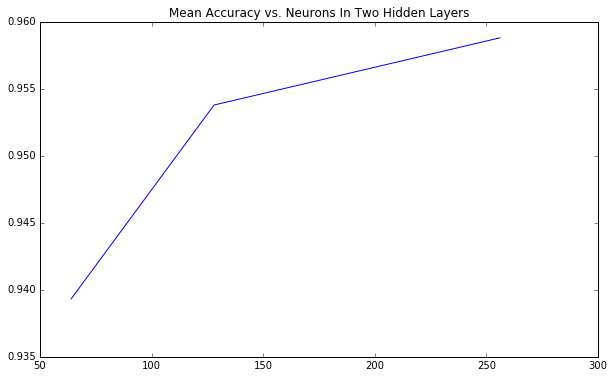

In [14]:
# Neural Network with Two Hidden Layers

nn_two_hidlay_neurons = [
    (64,64),
    (128,128),
    (256,256)
]

nn_two_hidlay_accuracies = []

for nn in nn_two_hidlay_neurons:
    nn_accuracies = cross_validation(nn)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_hidlay_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(10,6))
plt.title('Mean Accuracy vs. Neurons In Two Hidden Layers')
# plt.xlim(50, 265)
# plt.ylim(0.925, 0.96)
# plt.xticks(np.arange(75, 251, step=25))
# plt.yticks(np.arange(0.93, 0.955, step=0.0025))
x = [x[0] for x in nn_two_hidlay_neurons]
plt.plot(x, nn_two_hidlay_accuracies)

In [15]:
nn_two_hidlay_accuracies

[0.9393318485523385, 0.9538010393466964, 0.958813412521653]

#### Summary
Using 2 hidden layers improved our simple accuracy to 96%. While traditionally we would be worried about overfitting, using 4-fold cross validation also gives us a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

In [16]:
# Neural Network with Three Hidden Layers

def train(neuron_arch, train_features, train_labels):
    mlp_nn = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp_nn.fit(train_features, train_labels)
    return mlp_nn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_labels'] = test_labels
    train_test_df['predicted_labels'] = predictions
    overall_accuracy = sum(train_test_df['correct_labels']
                           == train_test_df['predicted_labels'])/len(train_test_df)
    return overall_accuracy

# modifying the neural network pipeline to use 6 fold cross validation
def cross_validation(neuron_arch):
    fold_accuracies = []
    kfold = KFold(n_splits=6, random_state=2)
    for train_index, test_index in kfold.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



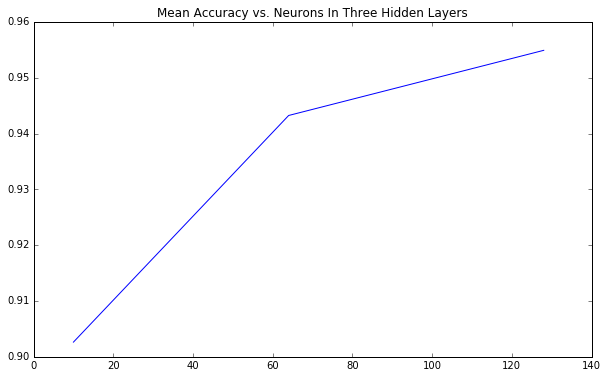

In [17]:
nn_three_hidlay_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_hidlay_accuracies = []

for nn in nn_three_hidlay_neurons:
    nn_accuracies = cross_validation(nn)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_hidlay_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(10,6))
plt.title('Mean Accuracy vs. Neurons In Three Hidden Layers')
# plt.xlim(0, 135)
# plt.ylim(0.85, 0.961)
# plt.xticks(np.arange(20, 121, step=20))
# plt.yticks(np.arange(0.89, 0.96, step=0.01))
x = [x[0] for x in nn_three_hidlay_neurons]
plt.plot(x, nn_three_hidlay_accuracies)

In [18]:
nn_three_hidlay_accuracies

[0.9026309921962096, 0.9432478632478632, 0.9549238201412115]

#### Summary
Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation.